<a href="https://colab.research.google.com/github/agustinivandinocco-python/pythonpracticateoria/blob/main/Colab/clase_07_2025_scraping_apis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graficos intro

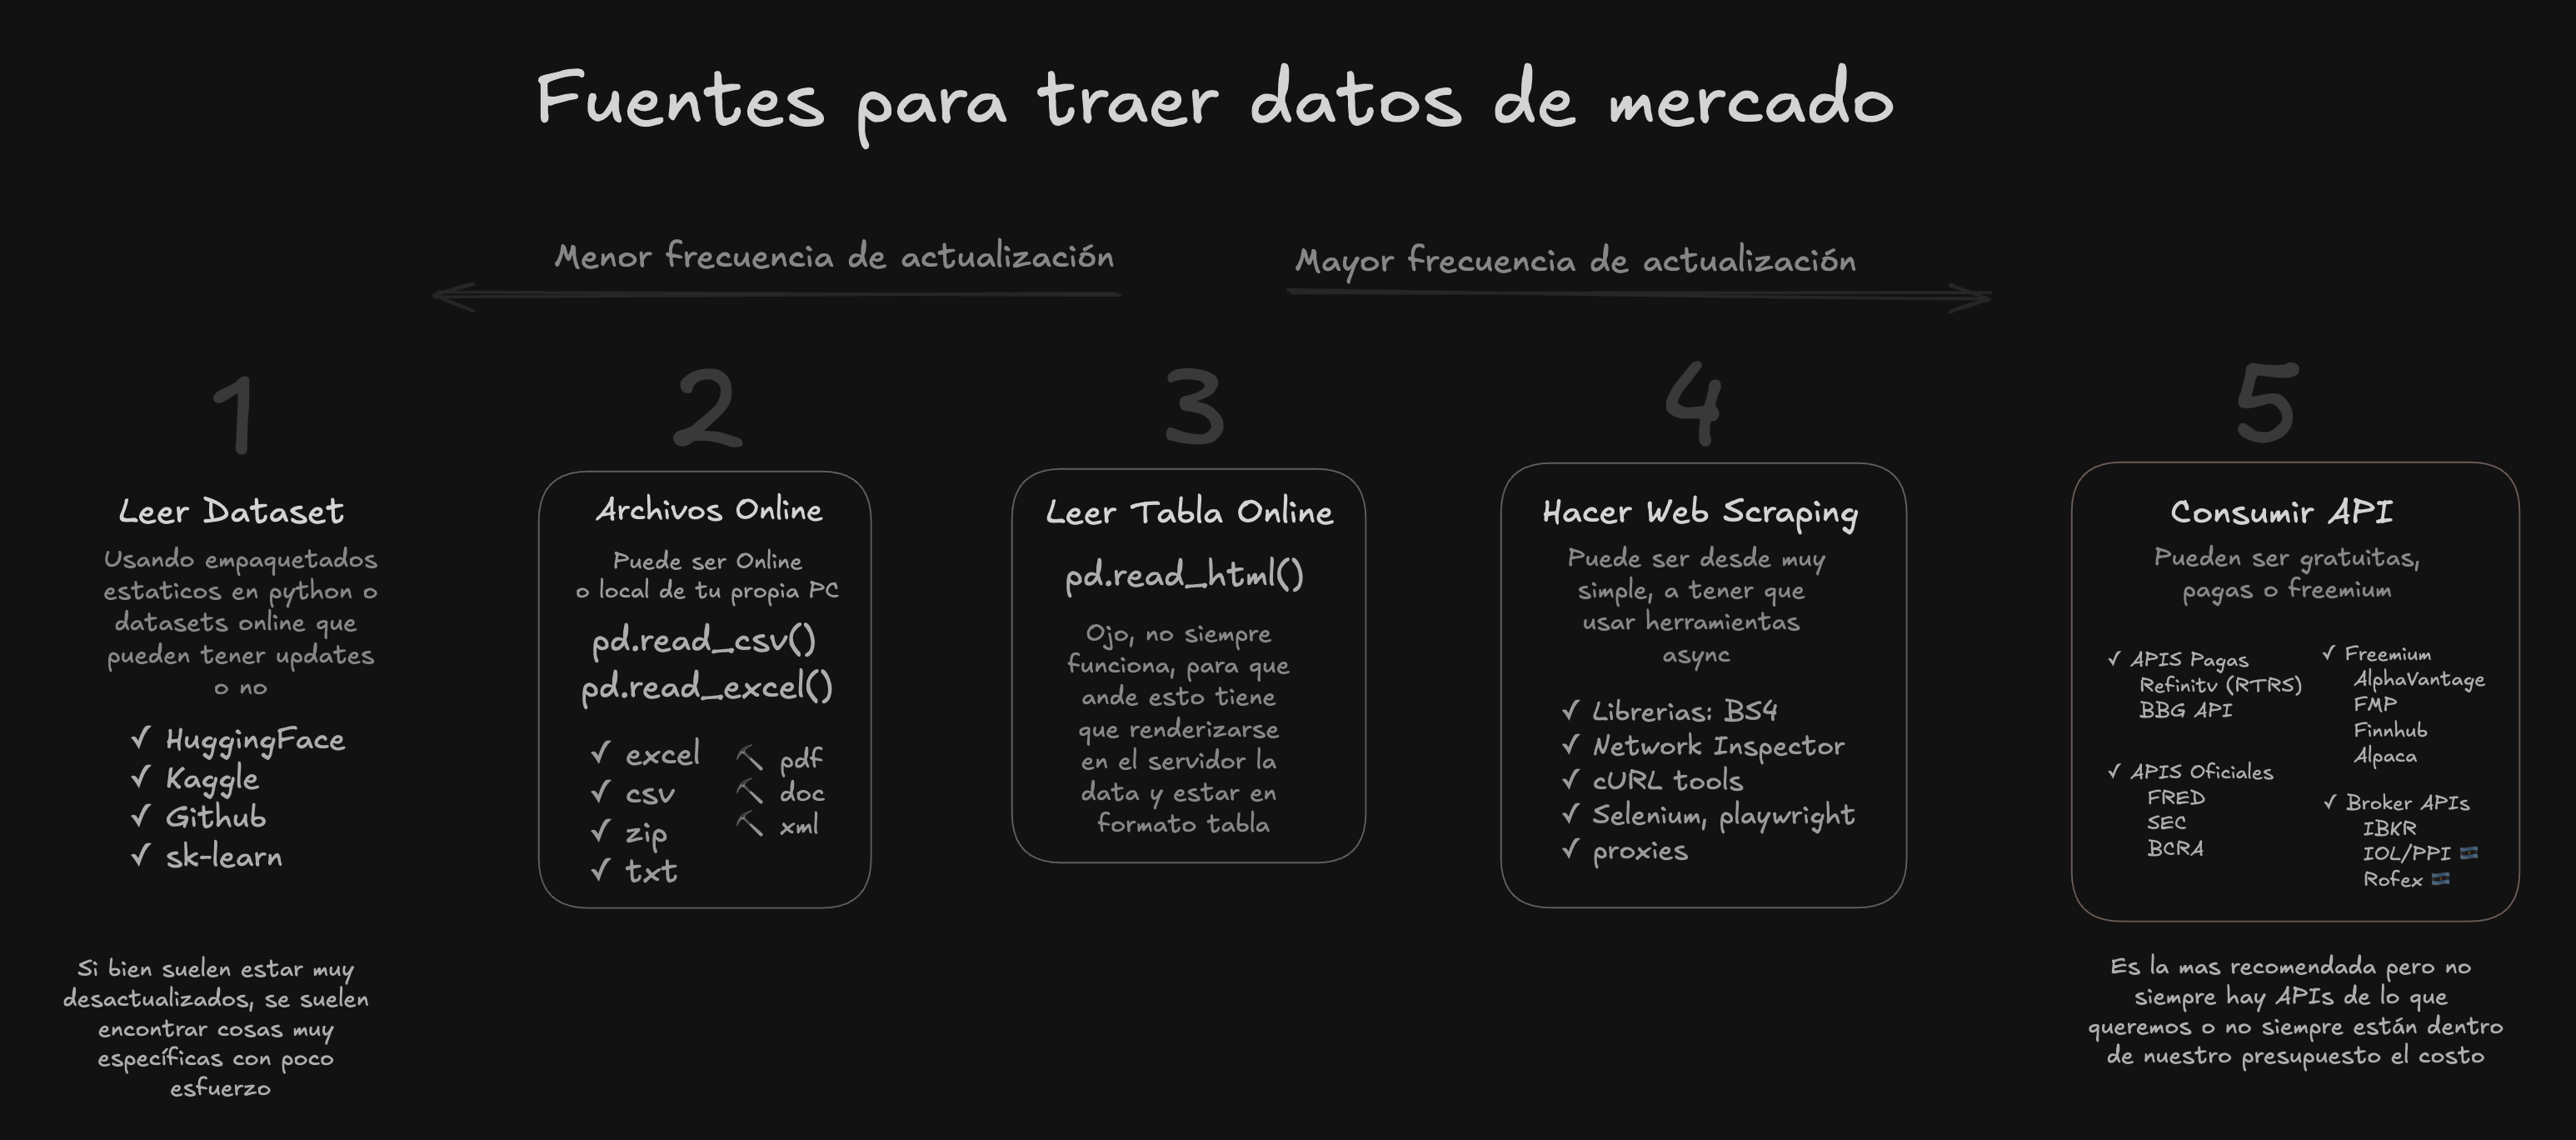

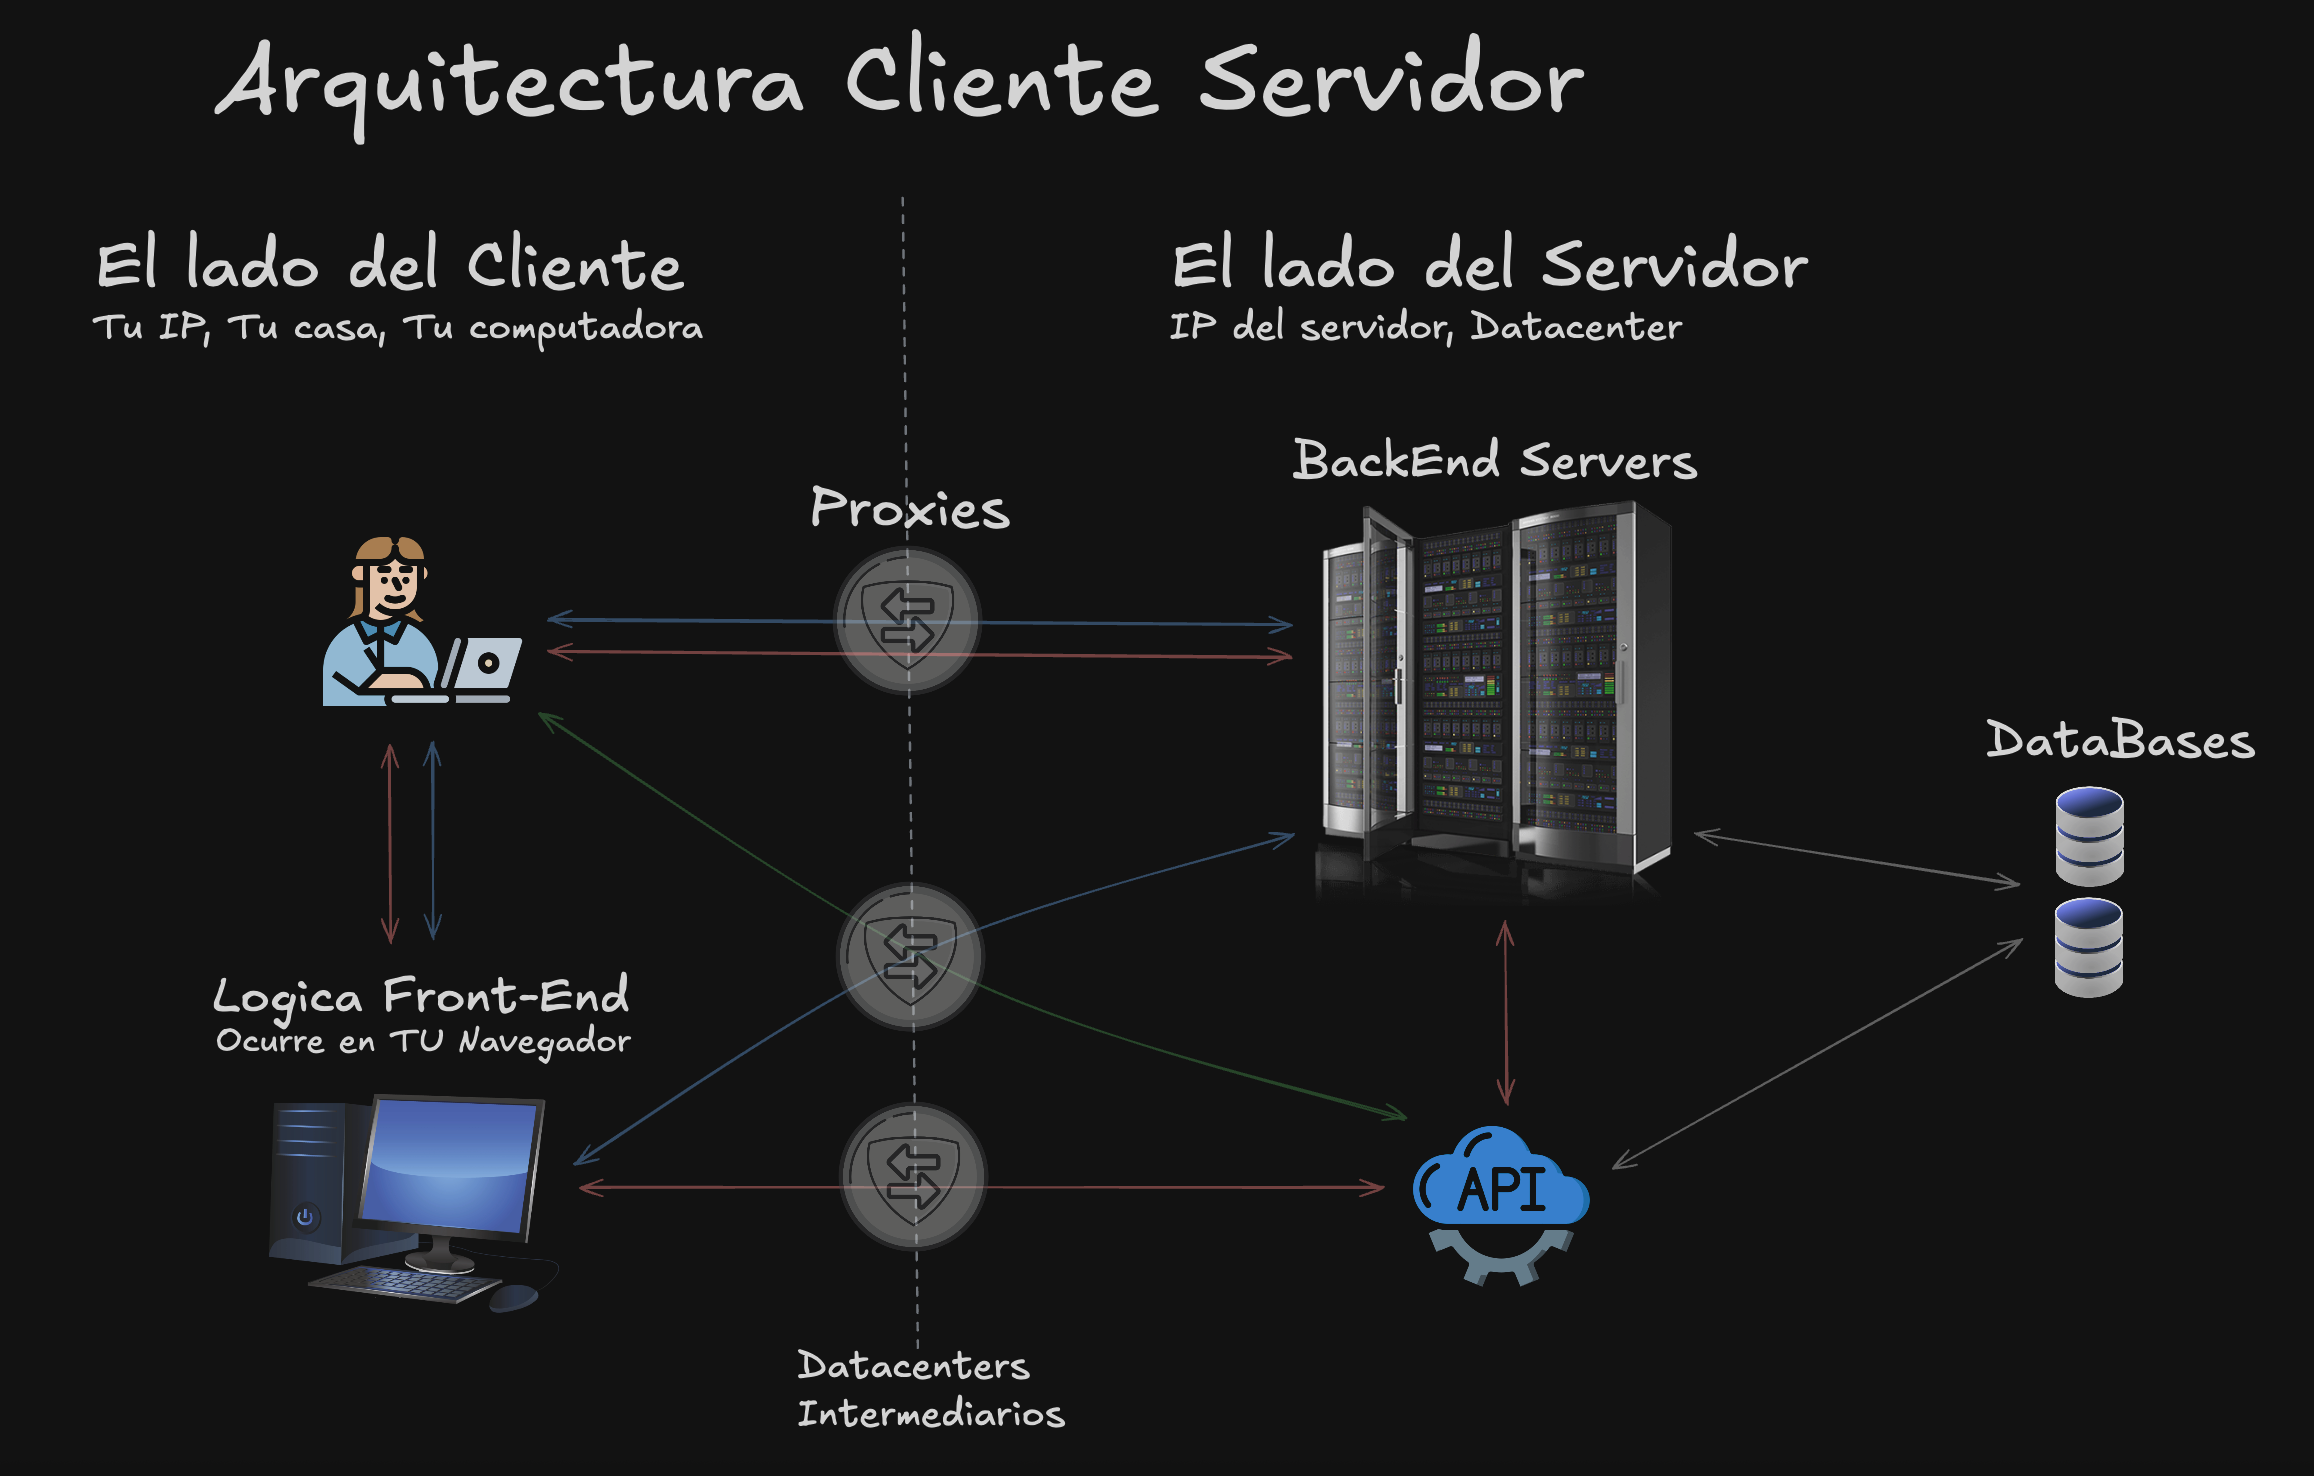

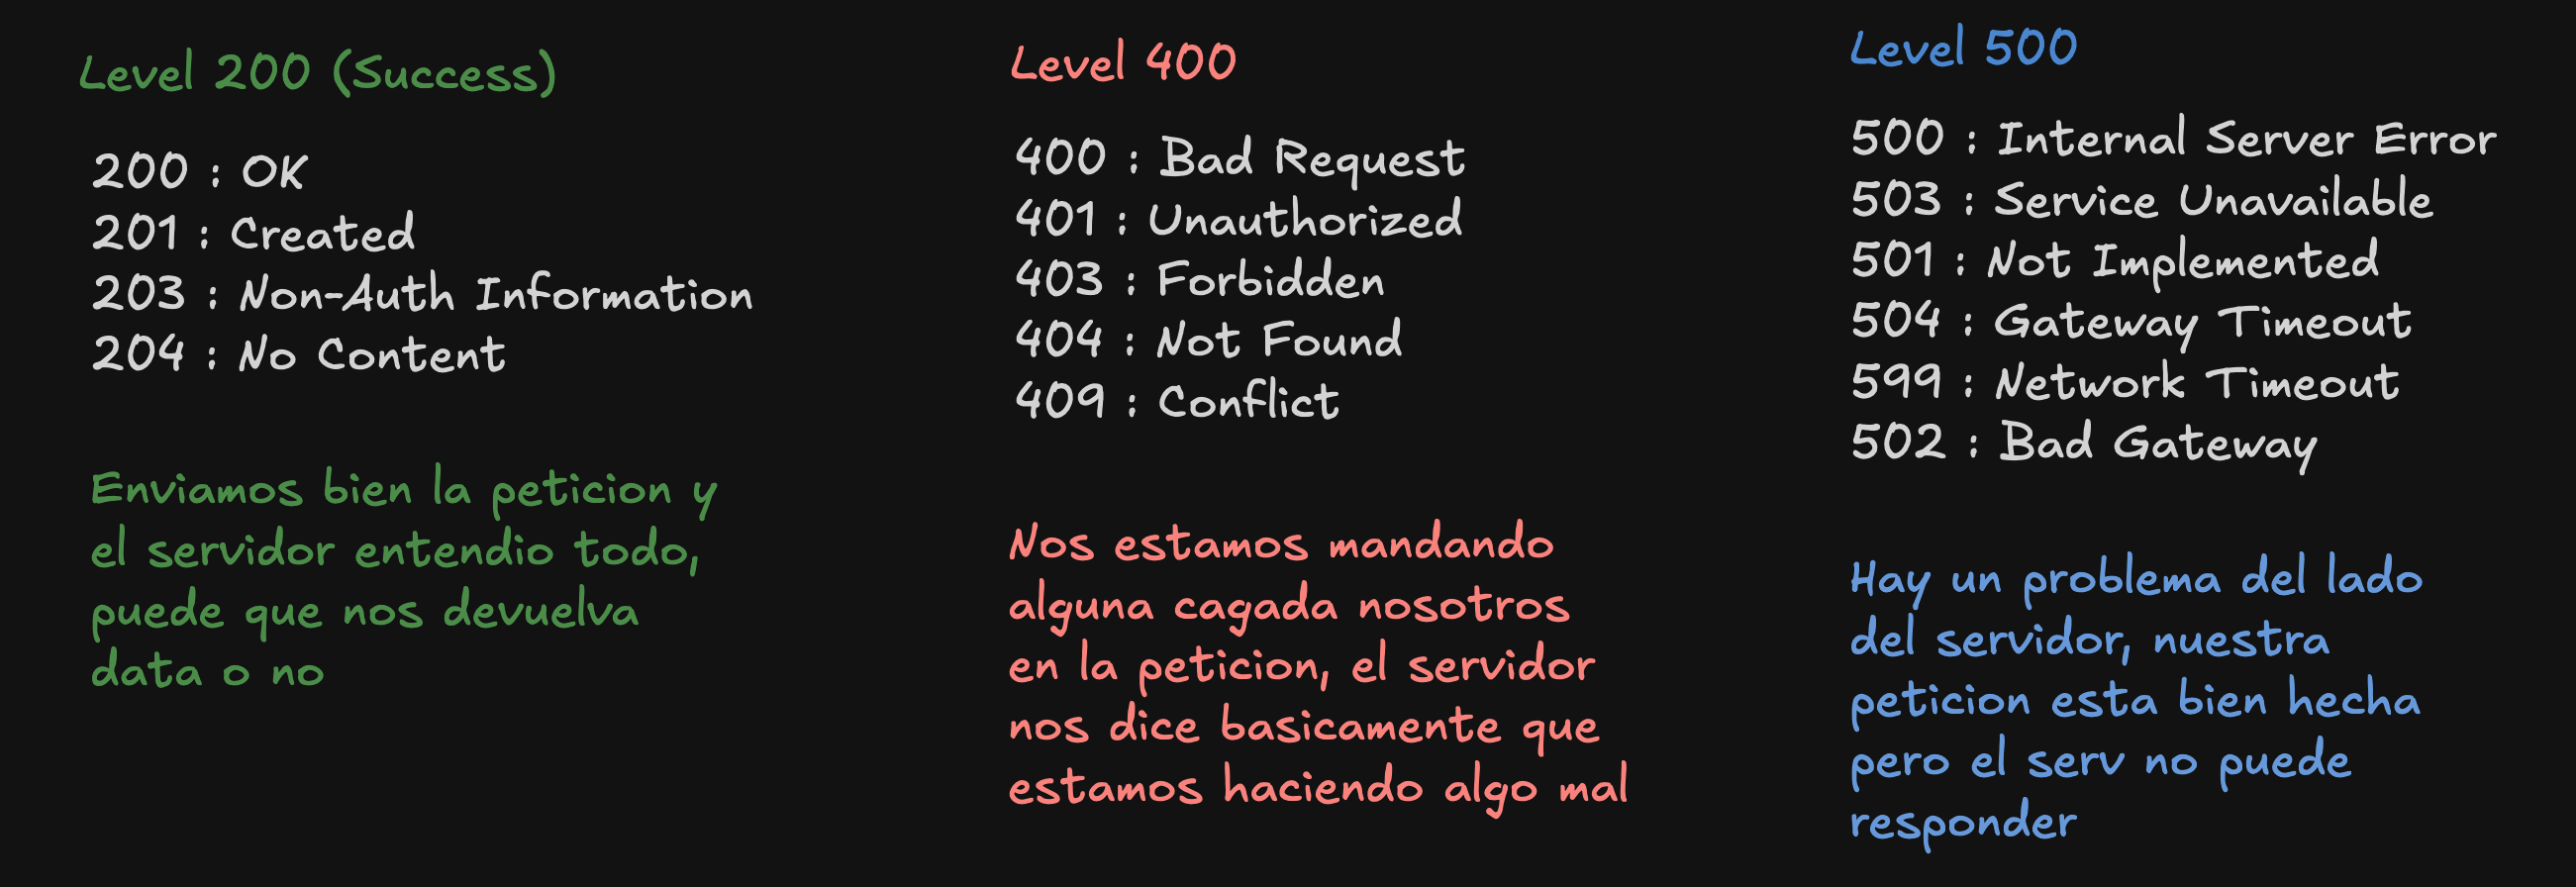

# Web Scraping

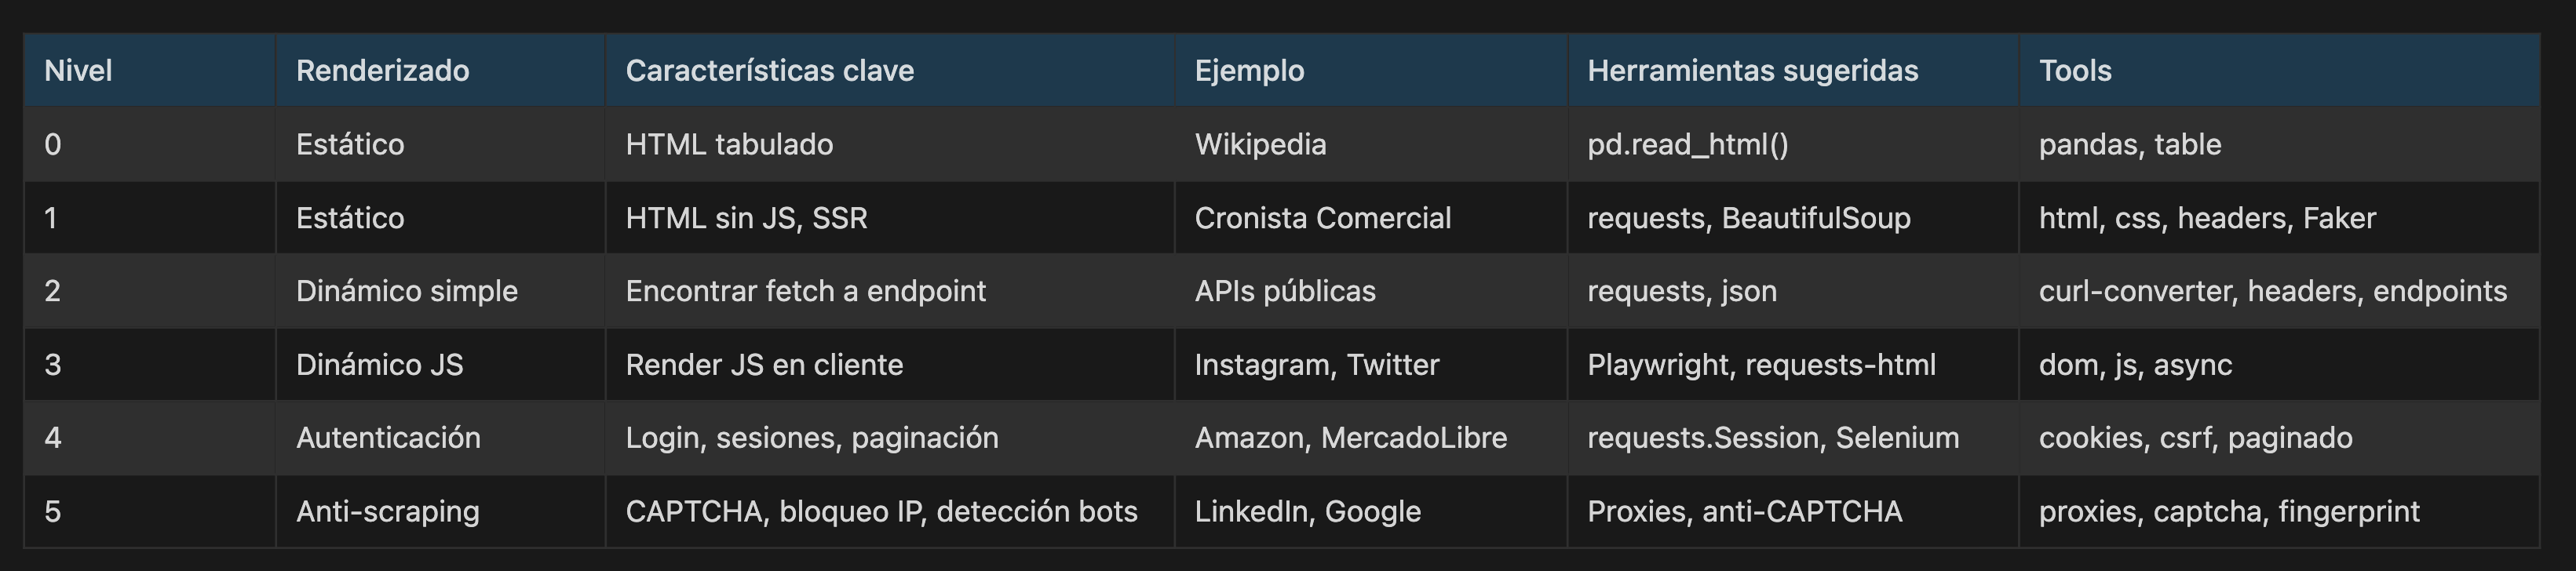

## Herramientas utiles para scraping

- **Peticiones desde el navegador**

  - [hoppscotch.com](https://hoppscotch.io/): herramienta online para convertir cURL a Python



- **cURL**

  - [curlconverter.com](https://curlconverter.com/): herramienta online para convertir cURL a Python


- **API-style scraping (pago por uso)**

  - [ScraperAPI](https://www.scraperapi.com/pricing/)  (usd 17x1.000 SERPs, usd 5x10.000 webs, tiene un plan basico FREE)

  - [DataForSEO](https://dataforseo.com/) (USD 6×10.000 SERPs)

  - [ScrapingBee](https://www.scrapingbee.com/#pricing) (USD 3.2×10.000 SERPs)


- **Proxies dinámicos baratos (rotativos residenciales)**

  - [DataImpulse](https://dataimpulse.com/): $1 /GB  

  - [Evomi](https://evomi.com/pricing): $1 /GB  

  - [711Proxy](https://www.711proxy.com/): $1.3 /GB  

  - [Proxy-Cheap](https://www.proxy-cheap.com/pricing/rotating-residential-proxy): $1.5 /GB  

  - [iProyal](https://iproyal.com): $1.7 /GB  

  - [LunaProxy](https://www.lunaproxy.com/): $2.4 /GB  

  - [IP2World](https://www.ip2world.com/): $2 /GB  

  - [ProxyOmega](https://proxyomega.com/): $3.2 /GB  

  - [FlyProxy](https://www.flyproxy.com/): $2.4 /GB  

  - [ABCProxy](https://www.abcproxy.com/): $2.23 /GB  

  - [Soax](https://soax.com/): $3 /GB


- **Manipulacion de datos**
  - [jsoncrack.com](https://jsoncrack.com/): visualizador avanzado de JSON

  - [DebugBear](https://www.debugbear.com/json-size-analyzer/): Debuger de JSON


## Extraccion + post procesado con pandas

Traigamos la data de:

https://www.macrotrends.net/stocks/charts/AAPL/apple/price-book

Prueben directamente un read_html() como hicimos las clases anteriores y van a ver que les devuelve un 403

Esto es porque ya Macrotrends no devuelve contenido si el agente no tiene un nombre de navegador conocido

Se soluciona muy facil primero haciendo un request como si fueramos un navegador y luego haciendo el read_html de ese contenido que traemos

In [ ]:
import pandas as pd

url = 'https://www.macrotrends.net/stocks/charts/AAPL/apple/price-book'
h = {
    'User-Agent': 'Mozilla/5.0',
    'Accept': 'application/json',
    'Accept-Language': 'en-US,en;q=0.9',
    'Connection': 'keep-alive'
}

# Este es el paso intermedio para que nos tome como un navegador
html = requests.get(url, headers=h)

# Y luego si hacemos el read_html() de lo que ya trajimos
data = pd.read_html(html.content)[0]
data.columns = data.columns.droplevel()
data

,Date,Stock Price,Book Value per Share,Price to Book Ratio
0,2025-05-21,202.09,NaN,45.20
1,2025-03-31,221.84,$4.47,49.62
2,2024-12-31,249.82,$4.44,56.28
3,2024-09-30,232.18,$3.77,61.63
4,2024-06-30,209.64,$4.38,47.84
...,...,...,...,...
61,2010-03-31,7.06,$1.54,4.57
62,2009-12-31,6.33,$1.41,4.49
63,2009-09-30,5.57,$1.26,4.44
64,2009-06-30,4.28,$1.03,4.15


¿Que puede pasar?

Y si, que Macrotrends algun dia ponga captchas y ese tipo de cosas para limitar el scraping

## Extraccion y post procesado con bs4

https://www.cronista.com

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


h = {
    'User-Agent': 'Pepe',
    'Accept': 'application/json',
    'Accept-Language': 'en-US,en;q=0.9',
    'Connection': 'keep-alive'
}
r = requests.get("https://www.cronista.com/columnistas/", headers=h)

soup = BeautifulSoup(r.content)

titles = [link.text for link in soup.find_all('a') if len(link.text) > 50]
links = [link.attrs.get('href') for link in soup.find_all('a') if len(link.text) > 50]

for i in range(10):
  print(titles[i])
  print('https://www.cronista.com'+links[i]+'\n')

El detrás de escena del último refuerzo del cepo para bancos y empresas
https://www.cronista.com/columnistas/el-detras-de-escena-del-ultimo-refuerzo-del-cepo-para-bancos-y-empresas/

La ola violeta amplía márgenes políticos, pero no borra asignaturas que marcaron los porteños
https://www.cronista.com/columnistas/la-ola-violeta-amplia-margenes-politicos-pero-no-borra-asignaturas-que-marcaron-los-portenos/

Sube el consumo en plataforma con apertura importadora y empuja ganancias del sistema de pagos
https://www.cronista.com/finanzas-mercados/sin-cepo-ni-aranceles-alza-del-comercio-en-dolares-empujo-ganancias-del-sistema-de-pagos/

JP Morgan anticipa que cederá la volatilidad del dólar y la incertidumbre del mercado
https://www.cronista.com/finanzas-mercados/jp-morgan-anticipa-que-cedera-la-volatilidad-del-dolar-y-la-incertidumbre-del-mercado/

Zoom editorial El dólar colchón y el Plan Dinamita sobre la obligación de informar las operaciones a ARCA
https://www.cronista.com/columnistas/el

# Scraping vs APIs

## Scraping

Desventajas para el cliente:

    * Mucho laburo preparar el barrido de datos, sujeto a errores y bugs
    * Dificil mantenibilidad

    
Desventajas para el Servidor:

    * Consumo ineficiente de ancho de banda (se bajan muchos recursos innecesarios)
    * Mala analítica de datos web (confunden tráfico con bots)


## APIs

Ventajas para el cliente:
    
    * Mas facil y rápidos requests
    * Mejor mantenibilidad y escalabilidad de los proyectos
    
Ventajas para el servidor:
    
    * Integración horizontal de servicios web gracias a desarrollos de 3ros
    * Mejor uso de recursos, mejor medición y control de analíticas de usuarios (gracias a API_Keys)

# APIs

Son un punete entre usuario/consumidor de datos y las bases de datos, no solo para lectura sino tambien escritura

## Algunas Apis financieras

## Tabla actualizada a Agosto 2024:

In [ ]:
data = {
    "Categories": ["FreeTier", "Equity Live", "Forex", "Crypto", "Commodities", "Bonds",
                   "Historical FA Statements", "Historical FA Ratios", "Valuations", "Price Targets/Estimates",
                   "Earning Calls", "SEC Links", "Historical EPS", "News", "IPO Calendar", "M&A",
                   "Technical Indicators", "Historical Intraday Bars", "13F/Insiders", "ETF & Funds",
                   "ESG Data", "Delisted Stocks", "Quant", "Simulations", "Options"],
    "Twelve": [1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1],
    "StockData": [1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0],
    "PortfOpt": [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0],
    "Polygon": [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1],
    "Intrino": [0,1,0,0,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1],
    "Finhub": [1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0],
    "FMP API": [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    "Finage": [1,1,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0],
    "AlphaV": [1,1,1,1,1,0,1,1,0,1,0,0,1,1,1,0,1,1,0,0,0,1,0,0,1],
    "Alpaca": [1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1],
    "Tiingo": [1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0],
    "EOD HD": [1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0],
    "MktStack": [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
}

df = pd.DataFrame(data)
df = df.set_index("Categories")
df.loc['Endpoints Coverage',:] = df.mean(axis=0)
df = df.replace(1,"Yes")
df = df.replace(0,"-")
df.loc['Req/day Max [k]',:] = [400,25,10,14400,2880,864,4000,4000,1728,14400,150,100,25]
df.loc['Price Min  $/Month',:] = [29,29,4,29,260,50,29,59,49,99,30,20,10]
df.loc['Price Max $/Month',:] = [999,99,4,199,10000,2500,139,2900,249,99,50,100,150]

df

,Twelve,StockData,PortfOpt,Polygon,Intrino,Finhub,FMP API,Finage,AlphaV,Alpaca,Tiingo,EOD HD,MktStack
Categories,,,,,,,,,,,,,
FreeTier,Yes,Yes,Yes,Yes,-,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Equity Live,Yes,Yes,-,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Forex,Yes,Yes,-,Yes,-,Yes,Yes,Yes,Yes,-,Yes,Yes,-
Crypto,Yes,Yes,-,Yes,-,Yes,Yes,Yes,Yes,Yes,Yes,Yes,-
Commodities,-,-,-,-,-,-,Yes,-,Yes,-,-,-,-
Bonds,Yes,-,-,-,Yes,Yes,-,Yes,-,-,-,Yes,-
Historical FA Statements,Yes,-,-,-,Yes,Yes,Yes,Yes,Yes,-,Yes,Yes,-
Historical FA Ratios,Yes,-,-,-,Yes,Yes,Yes,Yes,Yes,-,-,Yes,-
Valuations,-,-,-,-,Yes,-,Yes,-,-,-,-,-,-


## Links a las APIs FREEMIUM financieras de data

https://twelvedata.com/pricing

https://www.stockdata.org/pricing

https://portfoliooptimizer.io/?ref=public_apis

https://polygon.io/pricing

https://intrinio.com/pricing

https://finnhub.io/pricing-fundamental-data

https://site.financialmodelingprep.com/developer/docs/pricing

https://finage.co.uk/#pricing

https://www.alphavantage.co/premium/

https://docs.alpaca.markets/docs/about-market-data-api

https://www.tiingo.com/about/pricing

https://eodhd.com/pricing

https://marketstack.com/product

# Mas APIS

Algunos sitios que recopilan APIS

* El repositorio publico de GitHub tiene listadas 1425 APIs al dia de hoy
  
  https://github.com/public-apis/public-apis
  
  Es un proyecto colaborativo con cientos de contribuidores


* API List: Sitio web con aproximadamente 2000 APIs curadas en unas 100 categorías

  https://www.apislist.com


* OpenBB: Repo open source tipo terminal pero con fuentes de datos muy piolas

  Aca hay que buscar la fuente manualmente

  https://github.com/OpenBB-finance/OpenBBTerminal

  Ejemplo opciones: https://github.com/OpenBB-finance/OpenBBTerminal/tree/develop/openbb_terminal/stocks/options

### ¿Conviene usar una libreria o paquete o usar las APIs con funciones propias?

Conviene siempre, saber usar las APIs a "modo manual" es decir armando ustedes mismos las funciones y les pongo algunos por que:

#### Actualizacion
* Porque a veces actualizan las APIs y no los paquetes, con lo cual nos perdemos "potencia" de API por usarla del paquete
<br><br>


#### Personalización y parametrización
* Porque muchas veces necesitamos personalizar alguna función con algún parámetro extra que el paquete no lo brinda y nos terminamos limitando o haciendo un código menos eficiente
<br><br>


#### Mantenimiento y calidad
* Porque si bien uno se puede fijar las "estrellas" que tiene el repositorio del paquete que baja, muchas veces tienen bugs que no se notan o no tiran error y puede ser un problemón

### Tipos de APIs y Auth

* APIs públicas 100% (Fed)


* APIs mixtas  (Típico de las APIs de cryptos)
    * Endpoints públicos para marketData
    * Endpoints privados para manejo de cuenta
    
    
* APIs privadas
    * Auth por token simple en request GET  (IEX, FPM, Alpha Vantage, Finnhub)
    * Auth por token o par de tokens en encabezados con metodos POST o combinacion POST/GET  (Rofex)
    * Auth con tokens que expiran cada tanto y hay que ir renovandolos  (IOL, Deribit)
    * Auth con inicio de session (HitBTC)
    * Auth con firma encriptada (Binance)

# Glosario básico

Acostúmbrense a esas palabritas porque las vamos a nombrar un montón a partir de ahora
* Endpoint: Es una URL (dirección web) a la que vamos a apuntar para que me devuelva un dato
* Llamados/Requests: Es la acción de entrar a esa URL
* Response: Es la respuesta de la API a ese llamado
* StatusCode: Es un código estandarizado que nos devuelve junto con el Response (abajo los explico mejor)
* Servidor: Es la compu de la API
* Cliente: Es la compu nuestra o nuestro programa que hace el request
* Credenciales: Son las claves o tokens de autenticación
* Body: Es el cuerpo de los mensajes (contenido) entre cliente y servidor
* Headers: Son encabezados de los mensajes entre cliente y servidor (A veces aqui viajan las credenciales)
* Parametros: Son justamente los parámetros (variables) que necesita el endpoint que le mandemos en el mensaje, hay  opcionales y obligatorios
* SandBox: Son ambientes de prueba, para testear las funciones sin efecto real (como un simulador)
* POST, GET, PATCH, DELETE, UPDATE: Son los principales métodos de comunicación cliente/servidor, a grandes rasgos GET es el mas comun, POST es mas seguro y se usa para autenticación o para envío de info sensible ya que cuando viaja por GET podría ser interceptada mas facilmente

### Rate Limits

* Por dia, mes, semana
* Por minuto, segundo
* Ponderados según "peso" de cada endpoint
* Por token o por IP

# API AlphaVantage

## Leemos la documentacion

Ir a https://www.alphavantage.co y pedir su "api_key"

In [ ]:
apikey = '2RG2NEF3IPXMIPX3'
apikey = '09QXTWMZ1UBWMPO8'
apikey = 'N9P0QSV7X9VSJXV4'

## Primer request a un endpoint

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=15min&apikey=2RG2NEF3IPXMIPX3

Como verán es la serie de precios intradiarios, y me da una serie de parámetros obligatorios:
* function: El nombre de la función (en esta API es obligatorio siempre este parámetro)
* symbol: El ticker por ejemplo "AAPL"
* interval: El intervalo entre cada vela (1min, 5min, 15min, 30min 60min)
* apikey: Es nuestra clave, o token como definimos antes
<br><br>Y una serie de parámetros optativos:
* outputsize: Compacto o Full (aclara que  por default compacto devuelve solo 100 datos)
* datatype: Nos da la posibilidad de descargarlo en un CSV (tipo excel) o devolver un JSON (texto que leerá python), por default es JSON y es lo que siempre vamos a usar, a menos que sen la API para descargarse excels, pero no tendría mucho sentido

Bueno, antes de codear esto, vamos a aclarar una cosa, como dijimos un request de una API REST es ni mas ni menos como visitar una pagina web, asi que estos parámetros los podríamos poner en la barra del navegador web y tendría que funcionar, veamos un ejemplo, vamos a usar esta API para saber los precios intradiarios de AAPL en velas de 15 minutos

LA URL base es: https://www.alphavantage.co/query

Luego le debemos poner los parámetros, para ello:
* Al primer parámetro lo antecedemos por el signo "?"
* Y para concaternar los otros usamos el signo "&"

Entonces la URL final quedaría asi:

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=15min&apikey=2RG2NEF3IPXMIPX3

Así que veamos como sería eso, vamos a empezar por la manera mas burda de hacerlo y después lo emprolijamos


Vamos a tener importar tres librerías:


* requests: Para hacer el llamado HTTP a la API
* pandas: Para guardar los datos en un DataFrame


Obviamente solo necesito la librería requests para comunicarme con la API el resto es para trabajar con los datos que me devuelve

## Armamos código o instrucciones para automatizar el request

In [ ]:
#Importamos las librerías
import pandas as pd
import requests

#Definimos las variables (parámetros)
function = 'TIME_SERIES_INTRADAY'
symbol = 'AAPL'
interval = '15min'
token = "2RG2NEF3IPXMIPX3"


# https://www.alphavantage.co/query?
#function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&outputsize=full&apikey=demo

# Concateno la URL a visitar:
urlBase = 'https://www.alphavantage.co/query'
url = urlBase+'?function='+function
url += '&symbol='+ symbol
url += '&interval='+interval
url += '&outputsize=compact'
url += '&apikey='+token


#url = "https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GGAL&interval=15min&apikey=2RG2NEF3IPXMIPX3"
# Acá hago el llamado/Request
r = requests.get(url)

print(r)

<Response [200]>


In [ ]:
r.json().keys()

dict_keys(['Meta Data', 'Time Series (15min)'])

## Inspeccionamos el response

Bien, pero lo que vemos ahi cuando imprimimos el response, ¿que es?
<br>Es un objeto response de la librería requests, que obviamente tiene varios elementos y funciones:
* text o content: Es el texto plano como lo vemos en la web
* headers: Los encabezados
* status_code: Como vimos el código que ya vimos que es 200, es decir que la comunicación esta ok
* url: la url
* cookies: Las cookies
* json(): El método para obtener el objeto json, o diccionario del contenido

Veamos algun ejemplo:

In [ ]:
r.url

'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=15min&outputsize=compact&apikey=2RG2NEF3IPXMIPX3'

In [ ]:
r.status_code

200

In [ ]:
r.headers

{'Date': 'Mon, 12 Aug 2024 10:04:14 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Report-To': '{"group":"heroku-nel","max_age":3600,"endpoints":[{"url":"https://nel.heroku.com/reports?ts=1723457053&sid=1b10b0ff-8a76-4548-befa-353fc6c6c045&s=mVTs%2BYtC95lYc6ORR8mcDpjBZgZbOHTvmS5TD2aadfc%3D"}]}', 'Reporting-Endpoints': 'heroku-nel=https://nel.heroku.com/reports?ts=1723457053&sid=1b10b0ff-8a76-4548-befa-353fc6c6c045&s=mVTs%2BYtC95lYc6ORR8mcDpjBZgZbOHTvmS5TD2aadfc%3D', 'Nel': '{"report_to":"heroku-nel","max_age":3600,"success_fraction":0.005,"failure_fraction":0.05,"response_headers":["Via"]}', 'Allow': 'GET, HEAD, OPTIONS', 'X-Frame-Options': 'DENY', 'Vary': 'Cookie, Origin', 'X-Content-Type-Options': 'nosniff', 'Referrer-Policy': 'same-origin', 'Cross-Origin-Opener-Policy': 'same-origin', 'Via': '1.1 vegur', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '8b1fa3da9a1a2aaa-LAX', 'Content-Encoding': 'gzip'}

### Obtenemos la data que buscamos

In [ ]:
print(r.text[:2000])

{
    "Meta Data": {
        "1. Information": "Intraday (15min) open, high, low, close prices and volume",
        "2. Symbol": "AAPL",
        "3. Last Refreshed": "2024-08-09 19:45:00",
        "4. Interval": "15min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (15min)": {
        "2024-08-09 19:45:00": {
            "1. open": "216.3900",
            "2. high": "216.4700",
            "3. low": "216.3200",
            "4. close": "216.4200",
            "5. volume": "10257"
        },
        "2024-08-09 19:30:00": {
            "1. open": "216.3000",
            "2. high": "216.3900",
            "3. low": "216.3000",
            "4. close": "216.3700",
            "5. volume": "6202"
        },
        "2024-08-09 19:15:00": {
            "1. open": "216.2800",
            "2. high": "216.3800",
            "3. low": "216.2800",
            "4. close": "216.3100",
            "5. volume": "1495"
        },
        "2024-08-09 

### La pasamos a un formato manipulable

In [ ]:
r.json().keys()

dict_keys(['Meta Data', 'Time Series (15min)'])

In [ ]:
mi_dicc = r.json()

In [ ]:
mi_dicc['Meta Data']

{'1. Information': 'Intraday (15min) open, high, low, close prices and volume',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2025-05-20 19:45:00',
 '4. Interval': '15min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [ ]:
i = 0
for item in mi_dicc['Time Series (15min)'].items():
  print(item)
  i += 1
  if i >= 5:
    break

('2025-05-20 19:45:00', {'1. open': '206.3700', '2. high': '206.7000', '3. low': '206.3000', '4. close': '206.6000', '5. volume': '11490'})
('2025-05-20 19:30:00', {'1. open': '206.5100', '2. high': '206.5988', '3. low': '206.0800', '4. close': '206.3700', '5. volume': '7834'})
('2025-05-20 19:15:00', {'1. open': '206.6000', '2. high': '206.6800', '3. low': '206.2300', '4. close': '206.4600', '5. volume': '6704'})
('2025-05-20 19:00:00', {'1. open': '206.3700', '2. high': '206.7000', '3. low': '206.1600', '4. close': '206.6000', '5. volume': '8510'})
('2025-05-20 18:45:00', {'1. open': '206.4400', '2. high': '206.4400', '3. low': '206.1600', '4. close': '206.3700', '5. volume': '1736'})


### La pasamos a dataframe

In [ ]:
datos = r.json()['Time Series (15min)']

pd.DataFrame(datos).transpose()

,1. open,2. high,3. low,4. close,5. volume
2025-05-20 19:45:00,206.3700,206.7000,206.3000,206.6000,11490
2025-05-20 19:30:00,206.5100,206.5988,206.0800,206.3700,7834
2025-05-20 19:15:00,206.6000,206.6800,206.2300,206.4600,6704
2025-05-20 19:00:00,206.3700,206.7000,206.1600,206.6000,8510
2025-05-20 18:45:00,206.4400,206.4400,206.1600,206.3700,1736
...,...,...,...,...,...
2025-05-19 12:00:00,207.6400,208.0400,207.5801,207.9948,579582
2025-05-19 11:45:00,207.7000,207.8400,207.3800,207.6300,597253
2025-05-19 11:30:00,207.3200,207.9600,207.2800,207.7000,791065
2025-05-19 11:15:00,207.6100,207.7800,206.9650,207.3300,999023


In [ ]:
data = r.json()['Time Series (15min)']
dataDF = pd.DataFrame.from_dict(data, orient='index')
dataDF

,1. open,2. high,3. low,4. close,5. volume
2024-08-09 19:45:00,216.3900,216.4700,216.3200,216.4200,10257
2024-08-09 19:30:00,216.3000,216.3900,216.3000,216.3700,6202
2024-08-09 19:15:00,216.2800,216.3800,216.2800,216.3100,1495
2024-08-09 19:00:00,216.3000,216.3800,216.2500,216.2900,4589
2024-08-09 18:45:00,216.2050,216.3100,216.1500,216.2800,1954
...,...,...,...,...,...
2024-08-08 12:00:00,212.3700,212.9100,212.2330,212.8400,1074583
2024-08-08 11:45:00,212.0800,212.4600,211.7100,212.3900,809090
2024-08-08 11:30:00,212.2100,212.6800,211.9200,212.0800,1041947
2024-08-08 11:15:00,211.1750,212.3800,211.0800,212.2000,1424209


## Historical data: ¿QUE FALTA?

* Emprolijar código
* Mecanismo para evitar errores (API/Usuario)
* Meter todo el código en una función
* Que el dataframe esté ordenado cronologicamente
* Que el dataframe tenga valores numéricos
* Estandarizar los nombres de columnas del dataframe

### Emprolijamos el código

Pasando en limpio un poco el código, en lugar de concatenar la URL entera con todos los parámetros, lo que podemos hacer, y es una buena práctica hacer, es mandar todos los parámetros como parámetros del rrequest en lugar de mandarlos concatenando la URL

In [ ]:
function = 'TIME_SERIES_INTRADAY'
symbol = 'AAPL'
interval = '15min'
size = 'compact'
token = "2RG2NEF3IPXMIPX3"

url = 'https://www.alphavantage.co/query'

parametros = {'function' : function, 'symbol': symbol, 'interval': interval,
              'outputsize': size, 'apikey': token}

# r = requests.get(url, data = parametros)
# r = requests.get(url, json = parametros)
r = requests.get(url, params=parametros)

data = r.json()['Time Series (15min)']
dataDF = pd.DataFrame.from_dict(data, orient='index')
dataDF

,1. open,2. high,3. low,4. close,5. volume
2025-05-20 19:45:00,206.3700,206.7000,206.3000,206.6000,11490
2025-05-20 19:30:00,206.5100,206.5988,206.0800,206.3700,7834
2025-05-20 19:15:00,206.6000,206.6800,206.2300,206.4600,6704
2025-05-20 19:00:00,206.3700,206.7000,206.1600,206.6000,8510
2025-05-20 18:45:00,206.4400,206.4400,206.1600,206.3700,1736
...,...,...,...,...,...
2025-05-19 12:00:00,207.6400,208.0400,207.5801,207.9948,579582
2025-05-19 11:45:00,207.7000,207.8400,207.3800,207.6300,597253
2025-05-19 11:30:00,207.3200,207.9600,207.2800,207.7000,791065
2025-05-19 11:15:00,207.6100,207.7800,206.9650,207.3300,999023


### Provoquemos error con el timeframe

In [ ]:
function = 'TIME_SERIES_INTRADAY'
symbol = 'AAPL'
interval = '5min'
size = 'compact'
token = "2RG2NEF3IPXMIPX3"

url = 'https://www.alphavantage.co/query'

parametros = {'function' : function, 'symbol': symbol, 'interval': interval,
              'outputsize': size, 'apikey': token}

# r = requests.get(url, data = parametros)
# r = requests.get(url, json = parametros)
r = requests.get(url, params=parametros)

data = r.json()['Time Series (15min)']
dataDF = pd.DataFrame.from_dict(data, orient='index')
dataDF

KeyError: 'Time Series (15min)'

In [ ]:
function = 'TIME_SERIES_INTRADAY'
symbol = 'AAPL'
interval = '5min'
size = 'compact'
token = "2RG2NEF3IPXMIPX3"

url = 'https://www.alphavantage.co/query'

parametros = {'function' : function, 'symbol': symbol, 'interval': interval,
              'outputsize': size, 'apikey': token}

# r = requests.get(url, data = parametros)
# r = requests.get(url, json = parametros)
r = requests.get(url, params=parametros)

data = r.json()[f'Time Series ({interval})']
dataDF = pd.DataFrame.from_dict(data, orient='index')
dataDF

,1. open,2. high,3. low,4. close,5. volume
2024-08-09 19:55:00,216.3300,216.4700,216.3200,216.4200,3966
2024-08-09 19:50:00,216.3800,216.4100,216.3500,216.3500,3279
2024-08-09 19:45:00,216.3900,216.3900,216.3400,216.3600,3012
2024-08-09 19:40:00,216.3400,216.3900,216.3400,216.3700,174
2024-08-09 19:35:00,216.3100,216.3600,216.3000,216.3300,3830
...,...,...,...,...,...
2024-08-09 12:00:00,214.7000,214.8900,214.6300,214.7200,259060
2024-08-09 11:55:00,215.2150,215.2200,214.5400,214.7000,385491
2024-08-09 11:50:00,215.2000,215.2900,214.9800,215.2200,236615
2024-08-09 11:45:00,215.1150,215.4500,215.1000,215.2000,223741


Y para terminar lo podemos meter en una función

### Arreglamos el error del intervalo o timeframe en forma genérica

In [ ]:
def getIntra(function, symbol, size, token, t):

    """
    params:
        t: Es el tiempo en minutos, valores posibles 1, 5, 15, 30, 60
        size: puede ser compact (100 datos) o full (todo lo que tenga la aPI)
    """

    interval = f"{t}min"
    url = 'https://www.alphavantage.co/query'

    parametros = {'function' : function, 'symbol': symbol, 'interval': interval,
                  'outputsize': size, 'apikey': token}

    r = requests.get(url, params=parametros)
    data = r.json()[f'Time Series ({interval})']
    dataDF = pd.DataFrame.from_dict(data, orient='index')

    return dataDF

In [ ]:
help(getIntra)

Help on function getIntra in module __main__:

getIntra(function, symbol, size, token, t)
    params:
        t: Es el tiempo en minutos, valores posibles 1, 5, 15, 30, 60
        size: puede ser compact (100 datos) o full (todo lo que tenga la aPI)



In [ ]:
data = getIntra(function="TIME_SERIES_INTRADAY", symbol="YPF", t=15, size="compact", token=token)
data

,1. open,2. high,3. low,4. close,5. volume
2024-08-09 19:30:00,20.5000,20.5000,20.5000,20.5000,1
2024-08-09 19:15:00,20.5000,20.5000,20.5000,20.5000,13
2024-08-09 19:00:00,20.5800,20.5800,20.5800,20.5800,58313
2024-08-09 18:30:00,20.5800,20.5800,20.5800,20.5800,58313
2024-08-09 17:45:00,20.2100,20.2100,20.2100,20.2100,80
...,...,...,...,...,...
2024-08-07 12:15:00,18.9900,19.1100,18.9650,19.0700,33944
2024-08-07 12:00:00,19.0400,19.0500,18.9500,19.0100,25828
2024-08-07 11:45:00,19.0600,19.1000,18.9300,19.0400,41561
2024-08-07 11:30:00,19.1600,19.1800,19.0400,19.0600,30417


In [ ]:
def getIntra(function, symbol, size, token, t):

    """
    params:
        t: Es el tiempo en minutos, valores posibles 1, 5, 15, 30, 60
        size: puede ser compact (100 datos) o full (todo lo que tenga la aPI)
    """

    interval = f"{t}min"
    url = 'https://www.alphavantage.co/query'

    parametros = {'function' : function, 'symbol': symbol, 'interval': interval,
                  'outputsize': size, 'apikey': token}

    r = requests.get(url, params=parametros)

    try:
        data = r.json()[f'Time Series ({interval})']
        dataDF = pd.DataFrame.from_dict(data, orient='index')
    except:
        dataDF = pd.DataFrame()
        print('Ojo que esta fallando el request \n\nRespuesta de la API:\n', r.text)

    return dataDF

In [ ]:
data = getIntra(function='TIME_SERIES_INTRADAY', symbol='AAPL', t=5,
                size='compact', token="2RG2NEF3IPXMIPX3")

data

,1. open,2. high,3. low,4. close,5. volume
2025-05-20 19:55:00,206.6100,206.7000,206.6000,206.6000,6168
2025-05-20 19:50:00,206.5900,206.6800,206.5700,206.6500,2473
2025-05-20 19:45:00,206.3700,206.6000,206.3000,206.5500,2849
2025-05-20 19:40:00,206.3500,206.5700,206.3000,206.3700,767
2025-05-20 19:35:00,206.5988,206.5988,206.3000,206.3010,445
...,...,...,...,...,...
2025-05-20 12:00:00,207.9100,208.0800,207.7200,207.9050,386731
2025-05-20 11:55:00,207.3300,208.4300,207.3000,207.9150,1457663
2025-05-20 11:50:00,207.3300,207.4450,207.2900,207.3350,156635
2025-05-20 11:45:00,207.1000,207.4362,207.0500,207.3398,272593


### Ojo siempre con los tipos

In [ ]:
data = getIntra(function='TIME_SERIES_INTRADAY', symbol='AAPL', t=5,
                size='compact', token="2RG2NEF3IPXMIPX3")

data.round(1).head() # por que no redondea?? que creen?

,1. open,2. high,3. low,4. close,5. volume
2025-05-20 19:55:00,206.6100,206.7000,206.6000,206.6000,6168
2025-05-20 19:50:00,206.5900,206.6800,206.5700,206.6500,2473
2025-05-20 19:45:00,206.3700,206.6000,206.3000,206.5500,2849
2025-05-20 19:40:00,206.3500,206.5700,206.3000,206.3700,767
2025-05-20 19:35:00,206.5988,206.5988,206.3000,206.3010,445


#### Inspeccionando los tipos..

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2025-05-20 19:55:00 to 2025-05-20 11:40:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [ ]:
# De que tipo es la data?

type(data.iloc[0]['1. open'])

str

In [ ]:
data = data.astype('float')

data.round(1).head()

,1. open,2. high,3. low,4. close,5. volume
2025-05-20 19:55:00,206.6,206.7,206.6,206.6,6168.0
2025-05-20 19:50:00,206.6,206.7,206.6,206.6,2473.0
2025-05-20 19:45:00,206.4,206.6,206.3,206.6,2849.0
2025-05-20 19:40:00,206.4,206.6,206.3,206.4,767.0
2025-05-20 19:35:00,206.6,206.6,206.3,206.3,445.0


In [ ]:
pd.to_numeric(data['5. volume'])

,5. volume
2025-05-20 19:55:00,6168.0
2025-05-20 19:50:00,2473.0
2025-05-20 19:45:00,2849.0
2025-05-20 19:40:00,767.0
2025-05-20 19:35:00,445.0
...,...
2025-05-20 12:00:00,386731.0
2025-05-20 11:55:00,1457663.0
2025-05-20 11:50:00,156635.0
2025-05-20 11:45:00,272593.0


In [ ]:
data = getIntra(function='TIME_SERIES_INTRADAY', symbol='AAPL', t=5,
                size='compact', token="2RG2NEF3IPXMIPX3")

data.apply(pd.to_numeric)

,1. open,2. high,3. low,4. close,5. volume
2023-07-10 19:55:00,188.520,188.590,188.46,188.590,5394
2023-07-10 19:50:00,188.490,188.580,188.45,188.460,3617
2023-07-10 19:45:00,188.460,188.520,188.45,188.520,1588
2023-07-10 19:40:00,188.470,188.480,188.45,188.450,1486
2023-07-10 19:35:00,188.570,188.600,188.45,188.480,5279
...,...,...,...,...,...
2023-07-10 12:00:00,187.521,187.585,187.21,187.335,990180
2023-07-10 11:55:00,187.785,187.920,187.52,187.530,489280
2023-07-10 11:50:00,187.720,187.984,187.72,187.785,481936
2023-07-10 11:45:00,187.960,187.975,187.60,187.729,658565


### Tips para descargar series de datos de precios de activos

* TIPOS NUMERICOS, estandarizar decimmales


* ORDEN (creciente)


* NOMBRES COLUMNAS (Open, High, Low, Close, Volume, VolumeUsd, pctChange)


* INDICE TIPO FECHA?


* FUNCION O PARAMETROS AL PEDO

In [ ]:
def getIntra(symbol, t, size='full'):

    """
    params:
        t: Es el tiempo en minutos, valores posibles 1, 5, 15, 30, 60
        size: puede ser compact (100 datos) o full (todo lo que tenga la aPI), por default es full
    """

    interval = f"{t}min"
    url = 'https://www.alphavantage.co/query'

    parametros = {'function' : 'TIME_SERIES_INTRADAY', 'symbol': symbol,
                  'interval': interval, 'outputsize': size, 'apikey': token}

    r = requests.get(url, params=parametros)

    try:
        data = r.json()[f'Time Series ({interval})']
        df = pd.DataFrame.from_dict(data, orient='index')
        df.index.name = 'Date'
        df.columns = ['Open','High','Low','Close','Volume']
        df = df.apply(pd.to_numeric)
        df.index = pd.to_datetime(df.index)
        df.sort_index(inplace=True)
        df['DailyChange'] = df.Close.pct_change()
        df.dropna(inplace=True)
    except:
        df = pd.DataFrame()
        print('Ojo que esta fallando el request \n\nRespuesta de la API:\n', r.text)

    return df

In [ ]:
getIntra('AAPL', 15)

,Open,High,Low,Close,Volume,DailyChange
Date,,,,,,
2025-04-21 04:15:00,194.4701,194.5101,194.0606,194.2504,9816,-0.001284
2025-04-21 04:30:00,194.2404,194.5001,193.8010,193.9108,17871,-0.001748
2025-04-21 04:45:00,193.8109,193.9608,193.4813,193.7610,19996,-0.000773
2025-04-21 05:00:00,193.7011,194.0307,193.3615,193.4813,5644,-0.001444
2025-04-21 05:15:00,193.4614,193.7211,193.1218,193.5912,18990,0.000568
...,...,...,...,...,...,...
2025-05-20 18:45:00,206.4400,206.4400,206.1600,206.3700,1736,-0.000339
2025-05-20 19:00:00,206.3700,206.7000,206.1600,206.6000,8510,0.001115
2025-05-20 19:15:00,206.6000,206.6800,206.2300,206.4600,6704,-0.000678


In [ ]:
import requests

headers = {
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en,es-ES;q=0.9,es;q=0.8',
    'Cache-Control': 'no-cache,no-store,max-age=1,must-revalidate',
    'Connection': 'keep-alive',
    'Content-Type': 'application/json',
    'Expires': '1',
    'Options': 'renta-variable',
    'Origin': 'https://open.bymadata.com.ar',
    'Referer': 'https://open.bymadata.com.ar/',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-origin',
    'Token': 'dc826d4c2dde7519e882a250359a23a2',
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36',
    'sec-ch-ua': '"Google Chrome";v="135", "Not-A.Brand";v="8", "Chromium";v="135"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Linux"',
}

json_data = {
    'excludeZeroPxAndQty': True,
    'T1': True,
    'T0': False,
    'Content-Type': 'application/json, text/plain',
}

response = requests.post(
    'https://open.bymadata.com.ar/vanoms-be-core/rest/api/bymadata/free/cedears',
    headers=headers,
    json=json_data,
    verify = False,
)

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'open.bymadata.com.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
pd.DataFrame(response.json())

,tradeVolume,symbol,imbalance,previousSettlementPrice,offerPrice,openInterest,vwap,numberOfOrders,openingPrice,tickDirection,...,tradingLowPrice,market,volumeAmount,volume,trade,tradeHour,securityType,closingPrice,settlementPrice,quantityBid
0,16236,AAL,-0.0412,6790.000,7300.00,0,6653.956024,284,6730.00,-1,...,6500.00,BYMA,1.080336e+08,16236,6510.00,16:56:00,CD,6520.00,6510.00,5
1,3920,AALD,-0.0713,6.030,6.49,0,5.791576,47,5.98,-1,...,5.60,BYMA,2.270298e+04,3920,5.60,16:53:00,CD,5.60,5.60,0
2,102106,AAP,-0.0874,2860.000,2950.00,0,2619.734100,339,2745.00,-1,...,2600.00,BYMA,2.674906e+08,102106,2610.00,16:56:00,CD,2610.00,2610.00,0
3,0,AAPDB,0.0000,8.500,0.00,0,0.000000,0,0.00,-1,...,0.00,BYMA,0.000000e+00,0,0.00,NaN,CD,8.50,0.00,0
4,97905,AAPL,-0.0186,12050.000,13500.00,0,11920.335529,1882,11925.00,-1,...,11675.00,BYMA,1.167060e+09,97905,11825.00,16:59:00,CD,11750.00,11825.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0,YZCA,0.0000,0.010,0.00,0,0.000000,0,0.00,-1,...,0.00,BYMA,0.000000e+00,0,0.00,NaN,CD,0.01,0.00,30000
913,0,YZCAC,0.0000,0.010,0.00,0,0.000000,0,0.00,-1,...,0.00,BYMA,0.000000e+00,0,0.00,NaN,CD,0.01,0.00,0
914,15040,ZM,-0.0145,2060.000,2150.00,0,2056.298870,67,2065.00,-1,...,2020.00,BYMA,3.092674e+07,15040,2030.00,16:56:00,CD,2030.00,2030.00,0
915,0,ZMC,0.0000,6.150,0.00,0,0.000000,0,0.00,-1,...,0.00,BYMA,0.000000e+00,0,0.00,NaN,CD,6.15,0.00,0


# Scraping por ing inversa

### Paginas financieras Argentinas simples de hacer scraping por ingenieria inversa (buscando APIs)

BYMA: https://www.byma.com.ar

BYMA Data: https://open.bymadata.com.ar/#/dashboard

ROFEX: https://matbarofex.primary.ventures/futuros/financieros
Nota: Rofex tiene API oficial gratuita (Primary)

CAFCI: https://www.cafci.org.ar/

MAE: https://marketdata.mae.com.ar/

### APIs financieras Argentinas


BCRA Oficial (Gratis): https://www.bcra.gob.ar/BCRAyVos/catalogo-de-APIs-banco-central.asp

ROFEX Oficial (Gratis): https://remarkets.primary.ventures/

Byma Oficial (Pago): https://www.byma.com.ar/productos/byma-apis/

Varios (Gratis): https://data912.com/

# APIs externas gratis

FED Oficial (Gratis): https://fred.stlouisfed.org/docs/api/fred/

Sec (Edgar) Oficial (Gratis): https://www.sec.gov/search-filings/edgar-application-programming-interfaces


In [ ]:
import requests

headers = {
    'accept': 'application/json',
    'accept-language': 'en,es-ES;q=0.9,es;q=0.8',
    'content-type': 'application/json',
    'origin': 'https://marketdata.mae.com.ar',
    'priority': 'u=1, i',
    'referer': 'https://marketdata.mae.com.ar/',
    'sec-ch-ua': '"Google Chrome";v="135", "Not-A.Brand";v="8", "Chromium";v="135"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Linux"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36',
}

response = requests.get(
    'https://api.marketdata.mae.com.ar/api/mercado/titulo/historicocauciones?oTitulo={%22fechaDesde%22:%222025-04-22%22,%22fechaHasta%22:%222025-05-22%22}',
    headers=headers,
    verify = False
)

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.marketdata.mae.com.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
pd.DataFrame(response.json())

,fecha,volumen,details
0,2025-05-20,3.255395e+12,"[{'fecha': '2025-05-20T00:00:00', 'montoConcer..."
1,2025-05-19,3.301201e+12,"[{'fecha': '2025-05-19T00:00:00', 'montoConcer..."
2,2025-05-16,3.296199e+12,"[{'fecha': '2025-05-16T00:00:00', 'montoConcer..."
3,2025-05-15,3.097366e+12,"[{'fecha': '2025-05-15T00:00:00', 'montoConcer..."
4,2025-05-14,3.051213e+12,"[{'fecha': '2025-05-14T00:00:00', 'montoConcer..."
5,2025-05-13,3.096294e+12,"[{'fecha': '2025-05-13T00:00:00', 'montoConcer..."
6,2025-05-12,2.955225e+12,"[{'fecha': '2025-05-12T00:00:00', 'montoConcer..."
7,2025-05-09,3.231878e+12,"[{'fecha': '2025-05-09T00:00:00', 'montoConcer..."
8,2025-05-08,3.211616e+12,"[{'fecha': '2025-05-08T00:00:00', 'montoConcer..."
9,2025-05-07,3.166571e+12,"[{'fecha': '2025-05-07T00:00:00', 'montoConcer..."


## Ejemplos de APIs internas, no documentadas

In [ ]:
import requests
import pandas as pd

In [ ]:
# SSLError: HTTPSConnectionPool(host='www.byma.com.ar', port=443) => verify=False

In [ ]:
# Byma home page

url = 'https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_montos'
agents = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
agents += "AppleWebKit/537.36 (KHTML, like Gecko) "
agents += "Chrome/91.0.4472.77 "
agents = "Safari/537.36"
h = {"user-agent": agents}

r = requests.get(url, headers=h, verify=False)
r.json()

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.byma.com.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'MensajeNro': 996610,
 'Montos': {'Cauciones': {'Monto': 0, 'Porcentaje': 0},
  'Futuros': {'Monto': 0, 'Porcentaje': 0},
  'Opciones': {'Monto': 833039468, 'Porcentaje': 0.05},
  'Pase_Colocador': 0,
  'Pase_Tomador': 0,
  'Prestamos_Titulos_Publicos': {'Monto': 5925345046, 'Porcentaje': 0.37},
  'Renta_Fija': {'Piso_SINAC': {'Obligaciones_Negociables': {'Monto': 37186907085,
     'Porcentaje': 2.29},
    'Titulos_Publicos': {'Monto': 577210103556, 'Porcentaje': 35.59}},
   'Sesion_Continua': {'Obligaciones_Negociables': {'Monto': 192732512940,
     'Porcentaje': 11.88},
    'Titulos_Publicos': {'Monto': 785004479647, 'Porcentaje': 48.4}}},
  'Total_Negociado_Acciones': {'Acciones': {'Monto': 14781852769,
    'Porcentaje': 0.91},
   'Cedears': {'Monto': 8134953659, 'Porcentaje': 0.5},
   'Ejercicios': {'Monto': 0, 'Porcentaje': 0},
   'Sesion_Continua': {'Monto': 0, 'Porcentaje': 0}},
  'Total_Negociado_BCBA': {'Monto': 1621809194170, 'Porcentaje': 100}}}

In [ ]:
# CAFCI

url = "https://api.cafci.org.ar/fondo"

querystring = {"estado":"1","include":"entidad;depositaria,entidad;gerente,tipoRenta,region,benchmark,clase_fondo","limit":"0"}

headers = {
  "accept": "application/json, text/plain, */*",
  "accept-language": "en,es-ES;q=0.9,es;q=0.8",
  "cache-control": "no-cache",
  "origin": "https://www.cafci.org.ar",
  "pragma": "no-cache",
  "priority": "u=1, i",
  "referer": "https://www.cafci.org.ar/",
  "sec-ch-ua": "\"Chromium\";v=\"136\", \"Google Chrome\";v=\"136\", \"Not.A/Brand\";v=\"99\"",
  "sec-ch-ua-mobile": "?0",
  "sec-ch-ua-platform": "\"macOS\"",
  "sec-fetch-dest": "empty",
  "sec-fetch-mode": "cors",
  "sec-fetch-site": "same-site",
  "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers, params=querystring)
pd.DataFrame(response.json()['data'])

,clasificacionVieja,regionVieja,horizonteViejo,tipoEscision,id,createdAt,updatedAt,nombre,codigoCNV,objetivo,...,excentoTasa,d569,d569FondoId,fechaCierreBalances,depositaria,gerente,tipoRenta,region,benchmark,clase_fondos
0,Renta Fija,Argentina,Corto Plazo,No aplicable,1,2017-07-07T22:09:18.000Z,2021-01-13T16:00:07.000Z,Alianza de Capitales,52,El objetivo es superar el rendimiento de la ta...,...,False,False,None,1900-12-30T04:16:48.000Z,"{'id': '65', 'createdAt': '2017-07-07T21:59:22...","{'id': '11', 'createdAt': '2017-07-07T21:59:22...","{'id': '3', 'createdAt': '1990-01-01T00:00:00....","{'id': '1', 'createdAt': '2017-07-07T22:09:10....","{'id': '9', 'createdAt': '2017-07-07T22:09:10....","[{'id': '1', 'createdAt': '2017-07-07T22:09:24..."
1,Renta Fija,Argentina,Largo Plazo,No aplicable,5,2017-07-07T22:09:18.000Z,2024-08-05T22:13:17.000Z,Alpha Planeamiento Conservador,113,,...,False,False,None,1900-12-31T00:00:00.000Z,"{'id': '62', 'createdAt': '2017-07-07T21:59:22...","{'id': '8', 'createdAt': '2017-07-07T21:59:22....","{'id': '3', 'createdAt': '1990-01-01T00:00:00....","{'id': '1', 'createdAt': '2017-07-07T22:09:10....","{'id': '11', 'createdAt': '2017-07-07T22:09:10...","[{'id': '5', 'createdAt': '2017-07-07T22:09:24..."
2,Renta Variable,Argentina,Largo Plazo,No aplicable,6,2017-07-07T22:09:18.000Z,2024-12-13T22:48:03.000Z,Pionero Acciones Argentinas,55,El objetivo del fondo es el crecimiento de cap...,...,False,False,None,1900-12-31T00:00:00.000Z,"{'id': '98', 'createdAt': '2017-07-07T21:59:22...","{'id': '54', 'createdAt': '2017-07-07T21:59:22...","{'id': '2', 'createdAt': '1990-01-01T00:00:00....","{'id': '1', 'createdAt': '2017-07-07T22:09:10....","{'id': '16', 'createdAt': '2019-06-13T20:31:10...","[{'id': '680', 'createdAt': '2017-07-07T22:09:..."
3,Renta Variable,Argentina,Largo Plazo,No aplicable,15,2017-07-07T22:09:18.000Z,2024-12-13T22:41:00.000Z,Pionero Acciones Plus,71,El objetivo del fondo es invertir en Acciones ...,...,False,False,None,1900-12-31T00:00:00.000Z,"{'id': '98', 'createdAt': '2017-07-07T21:59:22...","{'id': '54', 'createdAt': '2017-07-07T21:59:22...","{'id': '2', 'createdAt': '1990-01-01T00:00:00....","{'id': '1', 'createdAt': '2017-07-07T22:09:10....","{'id': '11', 'createdAt': '2017-07-07T22:09:10...","[{'id': '15', 'createdAt': '2017-07-07T22:09:2..."
4,Renta Variable,Argentina,Largo Plazo,No aplicable,21,2017-07-07T22:09:18.000Z,2024-08-05T21:11:47.000Z,Fima Acciones,3,El objetivo del fondo es la apreciación del ca...,...,False,False,None,1900-03-31T00:00:00.000Z,"{'id': '81', 'createdAt': '2017-07-07T21:59:22...","{'id': '2', 'createdAt': '2017-07-07T21:59:22....","{'id': '2', 'createdAt': '1990-01-01T00:00:00....","{'id': '1', 'createdAt': '2017-07-07T22:09:10....","{'id': '15', 'createdAt': '2019-06-13T20:30:14...","[{'id': '21', 'createdAt': '2017-07-07T22:09:2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Plazo Fijo,Argentina,Corto Plazo,No aplicable,1644,2025-05-05T18:50:32.000Z,2025-05-08T20:21:06.000Z,Gainvest Dólares Premium,1668,Sin datos,...,False,False,None,9999-12-31T03:00:00.000Z,"{'id': '115', 'createdAt': '2017-07-07T21:59:2...","{'id': '311', 'createdAt': '2017-07-07T21:59:2...","{'id': '4', 'createdAt': '1990-01-01T00:00:00....","{'id': '1', 'createdAt': '2017-07-07T22:09:10....","{'id': '11', 'createdAt': '2017-07-07T22:09:10...","[{'id': '5472', 'createdAt': '2025-05-05T18:52..."
1014,Renta Mixta,Argentina,Corto Plazo,No aplicable,1648,2025-05-05T19:36:22.000Z,2025-05-06T16:40:00.000Z,Pionero Dólar Dinámico,1647,Sin datos,...,False,False,None,9999-12-31T03:00:00.000Z,"{'id': '98', 'createdAt': '2017-07-07T21:59:22...","{'id': '54', 'createdAt': '2017-07-07T21:59:22...","{'id': '5', 'createdAt': '1990-01-01T00:00:00....","{'id': '1', 'createdAt': '2017-07-07T22:09:10....","{'id': '11', 'createdAt': '2017-07-07T22:09:10...","[{'id': '5486', 'createdAt': '2025-05-05T19:37..."
1015,Renta Mixta,Argentina,Flexible,No aplicabl

In [ ]:
# BymaData

url = "https://open.bymadata.com.ar/vanoms-be-core/rest/api/bymadata/free/public-bonds"

payload = {
  "T1": True,
  "T0": False,
  "Content-Type": "application/json, text/plain"
}
headers = {
  "content-type": "application/json",
  "Accept": "application/json, text/plain, */*",
  "Accept-Language": "en,es-ES;q=0.9,es;q=0.8",
  "Cache-Control": "no-cache,no-store,max-age=1,must-revalidate",
  "Connection": "keep-alive",
  "Expires": "1",
  "Options": "renta-fija",
  "Origin": "https://open.bymadata.com.ar",
  "Pragma": "no-cache",
  "Referer": "https://open.bymadata.com.ar/",
  "Sec-Fetch-Dest": "empty",
  "Sec-Fetch-Mode": "cors",
  "Sec-Fetch-Site": "same-origin",
  "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36",
  "sec-ch-ua": "\"Chromium\";v=\"136\", \"Google Chrome\";v=\"136\", \"Not.A/Brand\";v=\"99\"",
  "sec-ch-ua-mobile": "?0",
  "sec-ch-ua-platform": "\"macOS\"",
}

response = requests.post(url, json=payload, verify=False, headers=headers)
pd.DataFrame(response.json()['data'])

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'open.bymadata.com.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,tradeVolume,symbol,imbalance,previousSettlementPrice,offerPrice,openInterest,vwap,numberOfOrders,openingPrice,tickDirection,...,market,volumeAmount,volume,trade,daysToMaturity,tradeHour,securityType,closingPrice,settlementPrice,quantityBid
0,6398799,AE38,0.0067,81970.000000,83200.0,0,82301.827549,4798,82000.00,-1,...,BYMA,5.266329e+09,6398799,82520.000,4617.0,17:00,GO,82520.000,82520.000,4466
1,151472,AE38C,0.0011,70.450000,0.0,0,70.655460,93,70.54,-1,...,BYMA,1.070232e+05,151472,70.530,4617.0,16:12,GO,70.530,70.530,0
2,1965206,AE38D,0.0033,71.460000,72.0,0,71.597377,1429,71.74,-1,...,BYMA,1.407037e+06,1965206,71.700,4617.0,17:00,GO,71.700,71.700,120
3,3490470,AE38X,0.0000,82400.541281,0.0,0,82057.288000,1,0.00,2,...,BYMA,2.864185e+09,3490470,82057.288,4617.0,14:41,GO,82057.288,82057.288,0
4,0,AE38Y,0.0000,71.100000,0.0,0,0.000000,0,0.00,-1,...,BYMA,0.000000e+00,0,0.000,4617.0,NaN,GO,71.100,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,652,GD46C,0.0129,65.420000,0.0,0,66.344402,4,66.56,-1,...,BYMA,4.325600e+02,652,66.270,7720.0,15:33,GO,66.270,66.270,0
185,92266,GD46D,0.0046,66.660000,76.4,0,67.097552,47,67.48,-1,...,BYMA,6.190823e+04,92266,66.970,7720.0,16:49,GO,66.970,66.970,5
186,753545,GD46X,0.0000,79550.000000,0.0,0,77500.304000,1,0.00,2,...,BYMA,5.839997e+08,753545,77500.304,7720.0,16:52,GO,77500.304,77500.304,0
187,0,GD46Y,0.0000,63.040000,0.0,0,0.000000,0,0.00,-1,...,BYMA,0.000000e+00,0,0.000,7720.0,NaN,GO,63.040,0.000,0


# Endpoints AI

Les recomiendo este proveedor: https://openrouter.ai/

Tiene todos los modelos del mercado integrados, tiene muchisimos modelos FREE (con un rate limit razonable y mas si fondean la cuenta pero no es necesario)

In [ ]:
from google.colab import userdata
apikey_or = userdata.get('openr')

In [ ]:
import requests
import json

response = requests.post(
  url="https://openrouter.ai/api/v1/chat/completions",
  headers={
    "Authorization": f"Bearer {apikey_or}",
    "Content-Type": "application/json",
  },
  data=json.dumps({
    "model": "google/gemma-3n-e4b-it:free",
    "messages": [
      {
        "role": "user",
        "content": "Hola hablame de las acciones de la empresa Nvidia"
      }
    ],

  })
)

In [ ]:
print(response.json().get("choices")[0].get("message").get("content"))

¡Hola! Con gusto te hablaré sobre las acciones de Nvidia (NVDA). Aquí tienes un resumen completo, cubriendo su desempeño, factores clave, riesgos y perspectivas futuras.

**¿Qué hace Nvidia?**

Nvidia es una compañía de tecnología estadounidense conocida principalmente por sus unidades de procesamiento gráfico (GPU). Originalmente enfocada en gráficos para videojuegos, Nvidia ha expandido enormemente su alcance a campos como:

*   **Inteligencia Artificial (IA):** Sus GPUs son el hardware dominante para el entrenamiento y la inferencia de modelos de IA.
*   **Centros de datos:**  Proporciona soluciones de computación de alto rendimiento para centros de datos que alimentan la IA, el aprendizaje automático y la computación de alto rendimiento (HPC).
*   **Automoción:**  Desarrolla plataformas para coches autónomos, desde el procesamiento de sensores hasta la conducción.
*   **Gaming:**  Continúa siendo un líder en tarjetas gráficas para PC y consolas.
*   **Visualización profesional:**  

In [ ]:
response.json()

{'id': 'gen-1747850959-ETgOiIT2J2sVeyROqZcM',
 'provider': 'Google AI Studio',
 'model': 'google/gemma-3n-e4b-it:free',
 'object': 'chat.completion',
 'created': 1747850959,
 'choices': [{'logprobs': None,
   'finish_reason': 'stop',
   'native_finish_reason': 'STOP',
   'index': 0,
   'message': {'role': 'assistant',
    'content': '¡Hola! Con gusto te hablaré sobre las acciones de Nvidia (NVDA). Aquí tienes un resumen completo, cubriendo su desempeño, factores clave, riesgos y perspectivas futuras.\n\n**¿Qué hace Nvidia?**\n\nNvidia es una compañía de tecnología estadounidense conocida principalmente por sus unidades de procesamiento gráfico (GPU). Originalmente enfocada en gráficos para videojuegos, Nvidia ha expandido enormemente su alcance a campos como:\n\n*   **Inteligencia Artificial (IA):** Sus GPUs son el hardware dominante para el entrenamiento y la inferencia de modelos de IA.\n*   **Centros de datos:**  Proporciona soluciones de computación de alto rendimiento para centros